In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing Dataset

In [3]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

There are 891 rows and 12 columns in dataset.

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Checking Null values 

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df["Age"]=imp.fit_transform(df["Age"].values.reshape(-1,1))
df["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [9]:

imp=SimpleImputer(strategy='most_frequent')
df["Cabin"]=imp.fit_transform(df["Cabin"].values.reshape(-1,1))

In [10]:
df["Cabin"]

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [11]:
imp=SimpleImputer(strategy='most_frequent')
df["Embarked"]=imp.fit_transform(df["Embarked"].values.reshape(-1,1))
df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking Correlation

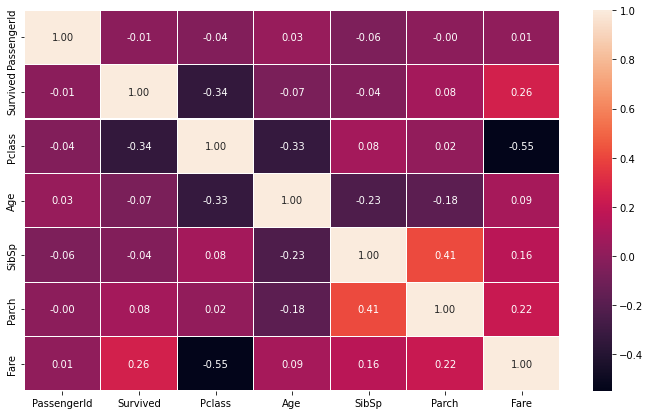

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="White",fmt=".2f")

- Parch has 8 percent correlation with target column which is considered as a weak +ve bond.

- Fare has 26 percent correlation with target column which is considered as a good +ve bond.

- SibSp has -4 percent correlation with target column which is considered as a weak -ve bood.

- Age has -7 percent correlation with target column which is considered as a weak -ve bood.

- Pclass has -34 percent correlation with target column which is considered as a good -ve bood.

- PassengerId has -1 percent correlation with target column which is considered as a weak -ve bood.




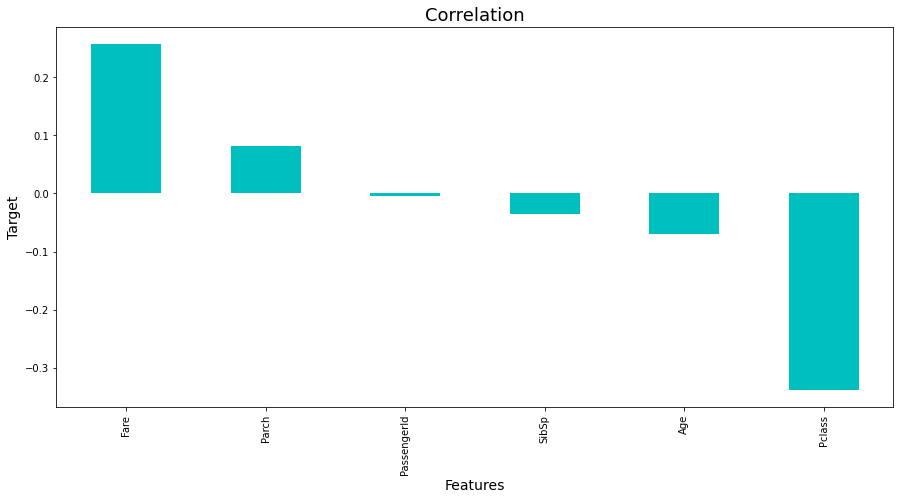

In [ ]:
plt.figure(figsize=(15,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


- Max -ve correlation : Pclass
- Min -ve correlation : PassengerId

- Max +ve correlation : Fare
- Min +ve correlation : Parch

# Visualization

3    491
1    216
2    184
Name: Pclass, dtype: int64


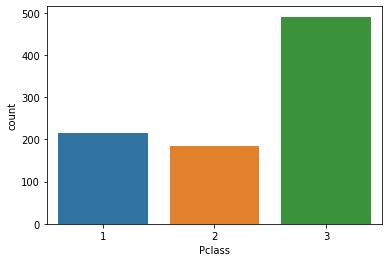

In [ ]:
sns.countplot(df["Pclass"])
print(df["Pclass"].value_counts())

Pclass feature has three category 
- 1 (216 passengers),
- 2 (184passengers),
- 3 (491passengers)

male      577
female    314
Name: Sex, dtype: int64


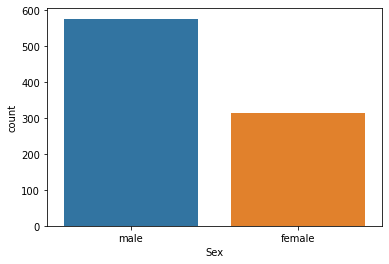

In [ ]:
sns.countplot(df["Sex"])
print(df["Sex"].value_counts())

- Among the passengers, 577 were male while 314 were female.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


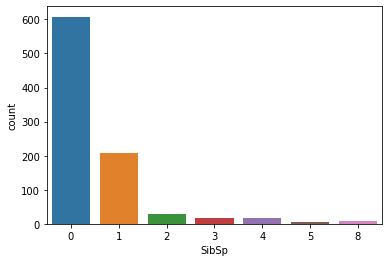

In [ ]:
sns.countplot(df["SibSp"])
print(df["SibSp"].value_counts())


- Sibsp 0 has highest count whereas 5 has lowest count.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


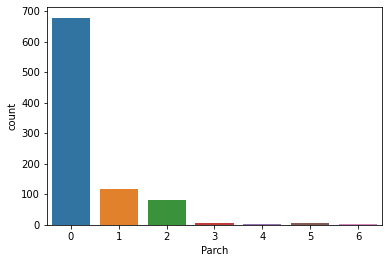

In [ ]:
sns.countplot(df["Parch"])
print(df["Parch"].value_counts())

- Parch 0 has highest count whereas Parch 6 has lowest count

S    646
C    168
Q     77
Name: Embarked, dtype: int64


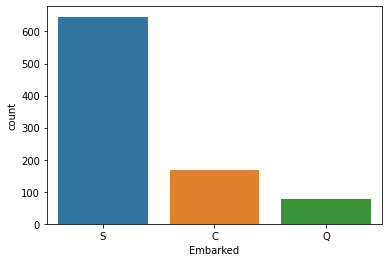

In [ ]:
sns.countplot(df["Embarked"])
print(df["Embarked"].value_counts())

There are 3 category in Embarked
- S (644 passengers)
- C (169 passengers)
- Q (78 passengers)

0    549
1    342
Name: Survived, dtype: int64


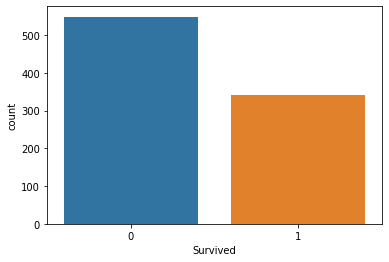

In [ ]:
sns.countplot(df["Survived"])
print(df["Survived"].value_counts())

- 549 passengers died whereas 342 Survived.

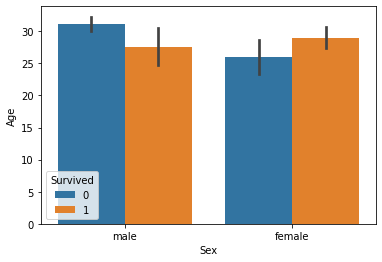

In [ ]:
sns.barplot(y=df["Age"],x=df["Sex"],hue=df["Survived"])

The average age of 
- men who didnt survive is slighty over 30 years and for survived men is in range of 25-30.
- female survival is between 25-30 years and those who didnt survive is slightly over 25 years.

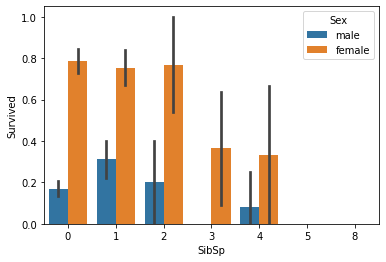

In [ ]:
sns.barplot(x=df["SibSp"],y=df["Survived"],hue=df["Sex"])

- Female with 0 sibling had highest survival rate whereas female with 4 siblings had least survival rate.
- Male with 1 sibling had highest survival rate whereas male with 4 siblings had least survival rate.

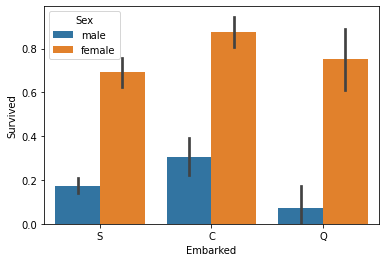

In [ ]:
sns.barplot(x=df["Embarked"],y=df["Survived"],hue=df["Sex"])

- Female who embarked at C had highest survival rate whereas female who embarked at S had lowest survival rate.

- Male who embarked at C had highest survival rate whereas male who embarked at Q had lowest survival rate.

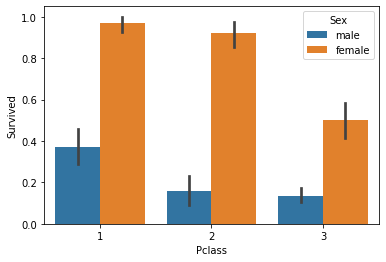

In [ ]:
sns.barplot(x=df["Pclass"],y=df["Survived"],hue=df["Sex"])

- Female from Passenger class 1 had highest survival rate whereas female from Passenger class 3 had lowest survival rate.
- Male from Passenger class 1 had highest survival rate whereas male from Passenger class 3 had lowest survival rate.
 

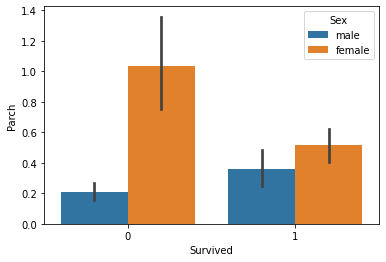

In [ ]:
sns.barplot(y=df["Parch"],x=df["Survived"],hue=df["Sex"])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


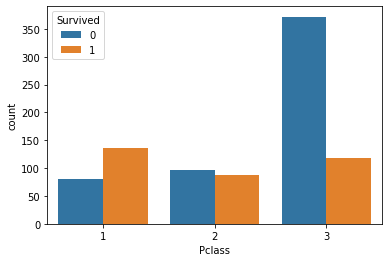

In [ ]:
sns.countplot(x=df["Pclass"],hue=df["Survived"])

- Passenger class 3 had highest death toll whereas
- Passenger class 1 had highest survivors.

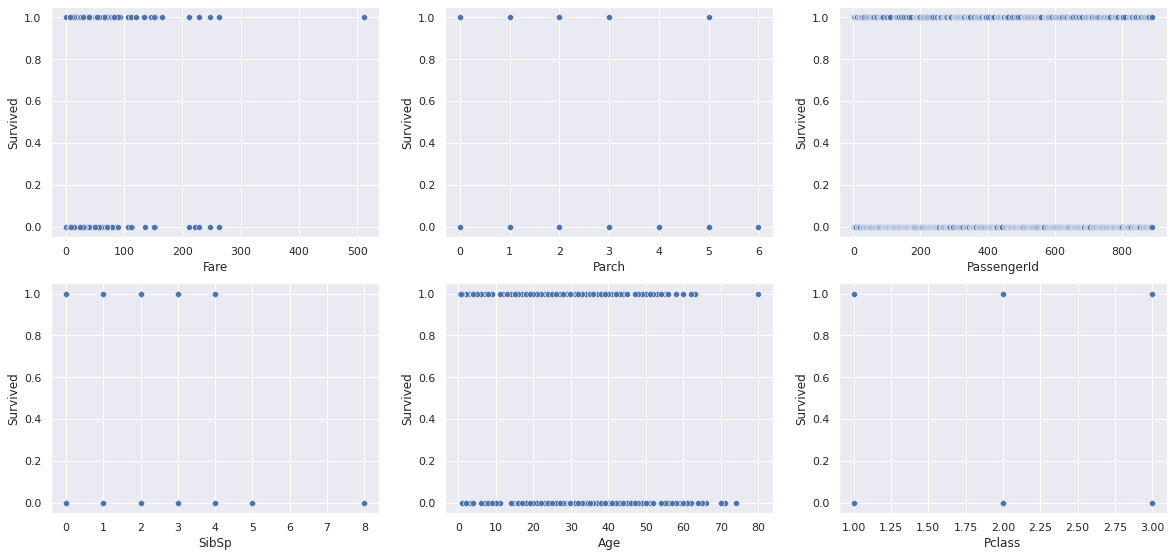

In [ ]:
import matplotlib.pyplot as plt
sns.set()
fig, axes = plt.subplots(2, 3,figsize=(20, 8))
plt.subplots_adjust(bottom=0.001)
sns.scatterplot(x="Fare",y="Survived",data=df,ax=axes[0,0])
axes[0,0].set_xlabel("Fare")
sns.scatterplot(x="Parch",y="Survived",data=df,ax=axes[0,1])
axes[0,1].set_xlabel("Parch")
sns.scatterplot(x="PassengerId",y="Survived",data=df,ax=axes[0,2])
axes[0,2].set_xlabel("PassengerId")
sns.scatterplot(x="SibSp",y="Survived",data=df,ax=axes[1,0])
sns.scatterplot(x="Age",y="Survived",data=df,ax=axes[1,1])
sns.scatterplot(x="Pclass",y="Survived",data=df,ax=axes[1,2])

The survivors in
- Fare is equally distributed between 0 and 100
- Parch is eually distributed between 0 and 3
- PassengerId is equally distributed between 0 and 850
- SibSp is equally distributed between 0 and 4
- Age is equally distributed between 20 and 40
- Pclass is equally distributed between 1.0 and 3.0

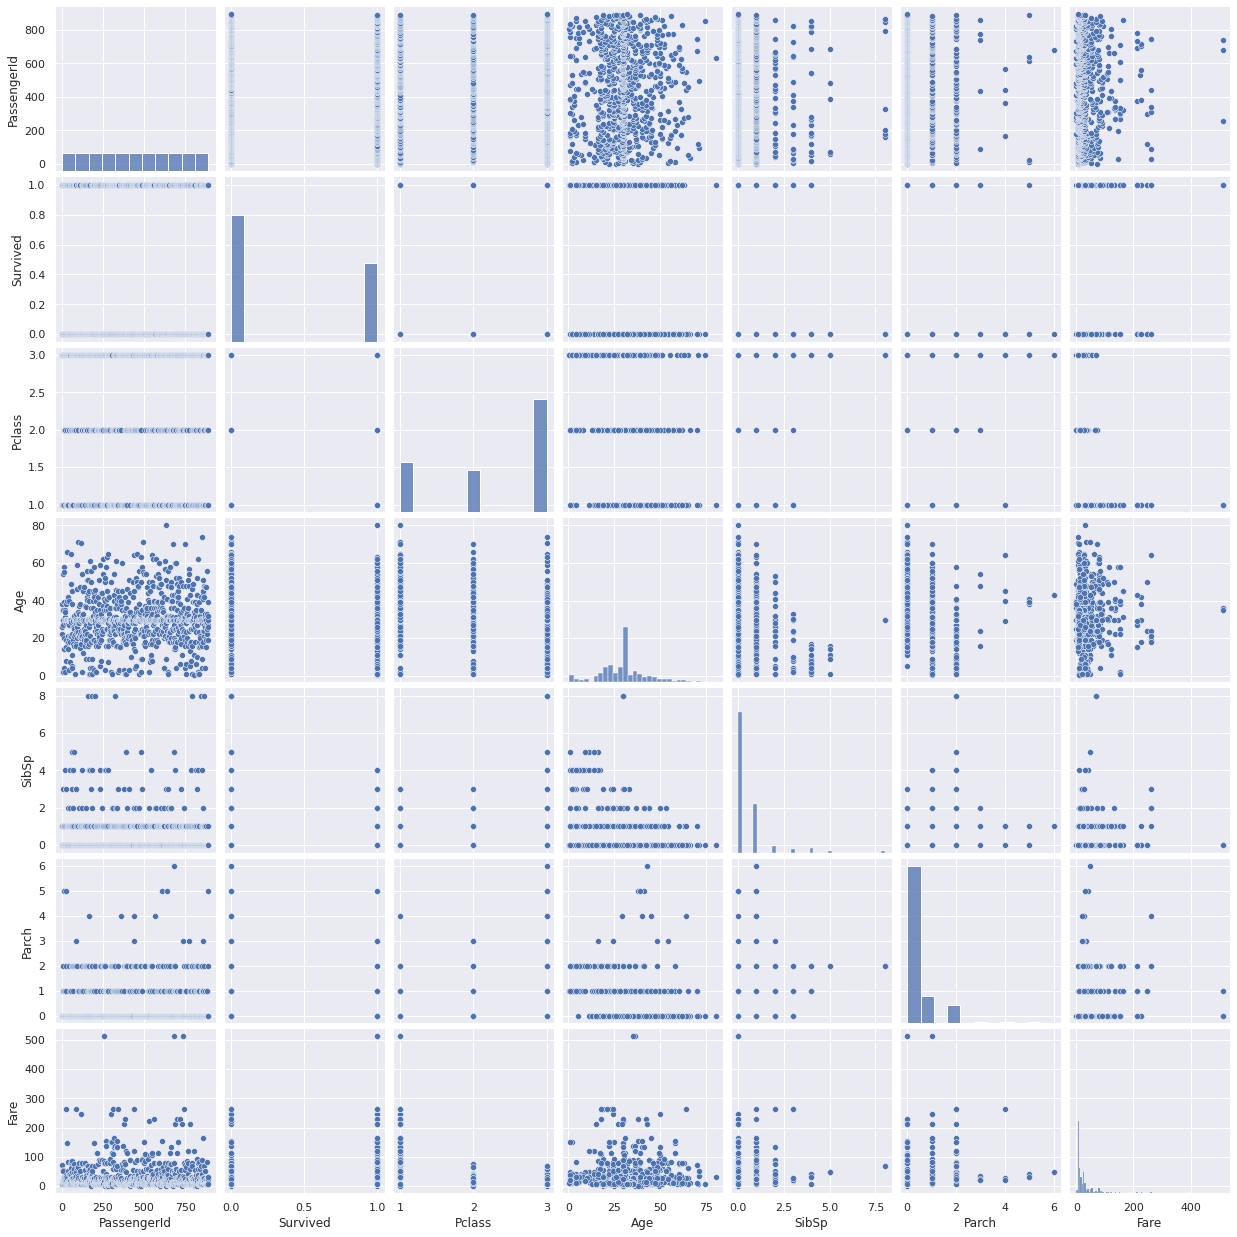

In [ ]:
sns.pairplot(df)

# Describing Data

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- There is huge gap between 75% and Max value which indicates presence of outlier in some of the features.

- Data is widely spread in PassengerId, Fare and Age compared to other features.

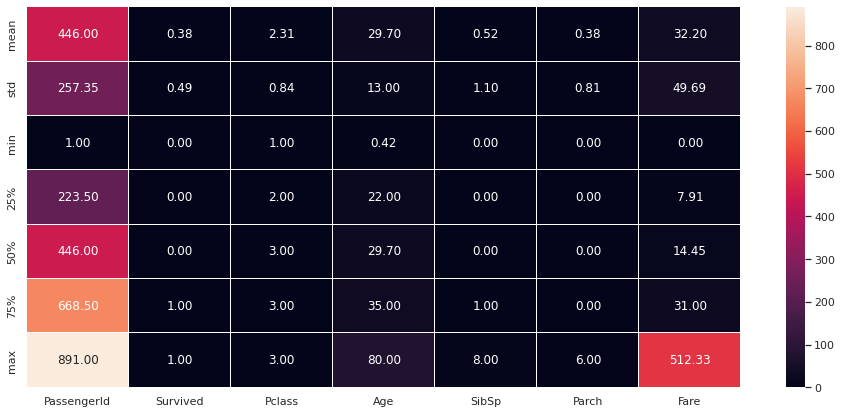

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
sns.heatmap(df.describe()[1:],annot=True,linewidths=0.1,linecolor="White",fmt=".2f")

PassengerId	
- mean -	446.000000
- std	- 257.353842	
- min	- 1.000000	
- max	- 891.000000	

Survived	
- mean	- 0.383838
- std	- 	0.486592
-min	- 	0.000000	
-max	- 	1.000000	

Pclass	
- mean	-	2.308642
-std	- 	0.836071	
-min	- 	1.000000	
-max	- 	3.000000	

Age	
- mean	- 29.699118	
-std -		13.002015	
-min -		0.420000	
-max -		80.000000	

SibSp	
- mean	-	0.523008	
-std	-	1.102743	
-min	-	0.000000	
-max	-	8.000000	

Parch	
- mean	- 0.381594	
-std	-	0.806057	
-min	-	0.000000	
-max	-	6.000000	

Fare
- mean	- 32.204208
-std	-	49.693429
-min	-	0.000000
-max	-	512.329200


# Checking Outliers

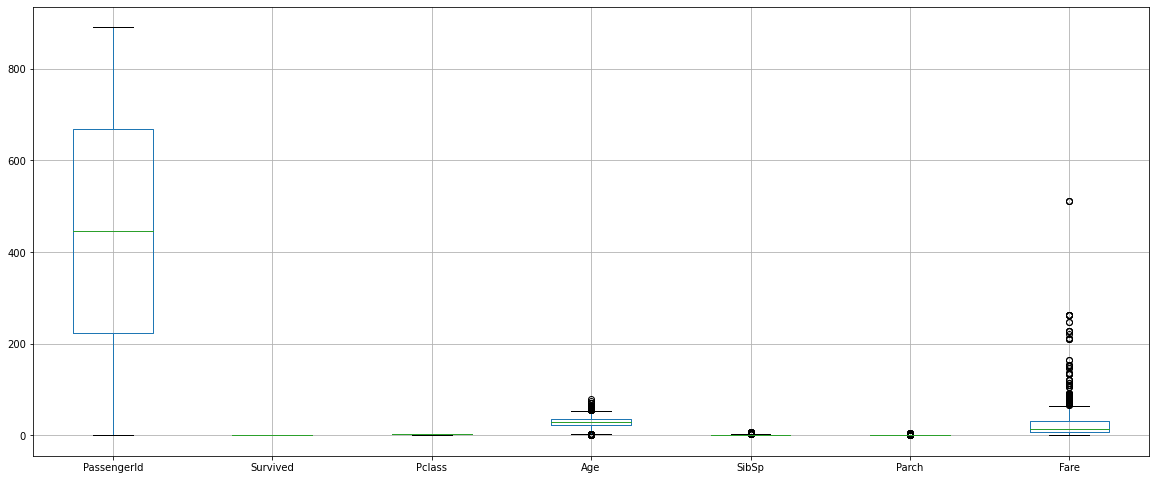

In [14]:
import matplotlib.pyplot as plt
df.iloc[:,0:13].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.1)
plt.show()

- PassengerId, survived, Pclass, SibSp and Parch is categorical features, hence we cant remove outlier. This leaves only age and Fare features.

In [15]:
df.shape

(891, 12)

In [16]:
new_df_cap = df.copy()

In [17]:
def remove_outliers(n):
    Q1 = np.percentile(df[n], 25, interpolation = 'midpoint')  
    Q3 = np.percentile(df[n], 75, interpolation = 'midpoint') 
    iqr = Q3 - Q1 
    percentile25 = df[n].quantile(0.25)
    percentile75 = df[n].quantile(0.75)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[df[n] > upper_limit]
    df[df[n] < lower_limit]
    
    new_df = df[df[n] < upper_limit]
    new_df.shape
    
    new_df_cap[n] = np.where(
    new_df_cap[n] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[n] < lower_limit,
        lower_limit,
        new_df_cap[n] ) )
    
    sns.boxplot(new_df_cap[n])
    

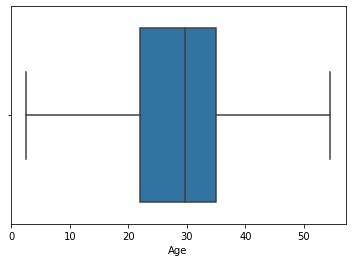

In [18]:
remove_outliers("Age")

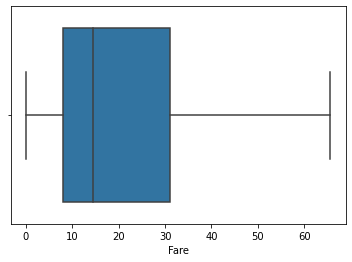

In [19]:
remove_outliers("Fare")

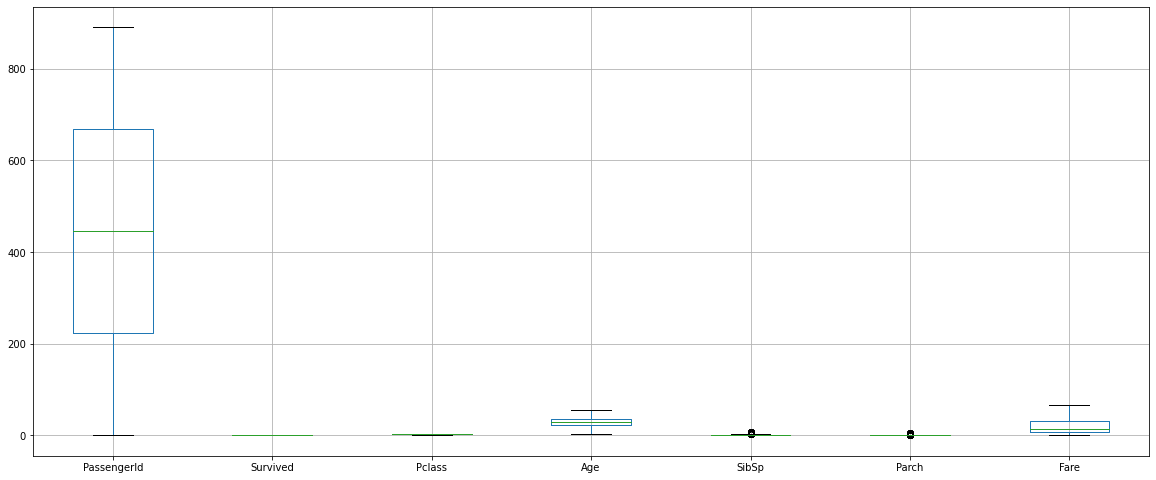

In [20]:
import matplotlib.pyplot as plt
new_df_cap.iloc[:,0:13].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.1)
plt.show()

# Separating feature and target data

In [21]:
x=new_df_cap.drop(["PassengerId"	,"Survived","Name","Ticket","Cabin"],axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6344,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [22]:
y=new_df_cap["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Encoding Categorical Feature

In [23]:
from sklearn.preprocessing import OrdinalEncoder 
enc=OrdinalEncoder()
x["Sex"]=enc.fit_transform(x["Sex"].values.reshape(-1,1))
x["Sex"]

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
886    1.0
887    0.0
888    0.0
889    1.0
890    1.0
Name: Sex, Length: 891, dtype: float64

In [24]:
x["Embarked"]=enc.fit_transform(x["Embarked"].values.reshape(-1,1))
x["Embarked"]

0      2.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    0.0
890    1.0
Name: Embarked, Length: 891, dtype: float64

# Detecting Skewness

In [25]:
x.skew().sort_values()

Embarked   -1.264823
Pclass     -0.630548
Sex        -0.618921
Age         0.080846
Fare        1.082179
Parch       2.749117
SibSp       3.695352
dtype: float64

Keeping +/-0.5 as the range for skewness we can see following have skewness
- Embarked
- Cabin
- Sex
- Fare
- Parch
- SibSp

Since majority of the features mentioned are categorical in nature we cannot remove skewness

- Only Fare is non-categorical feature

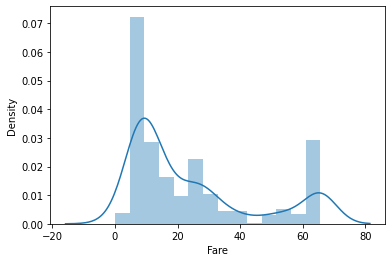

In [27]:
sns.distplot(x["Fare"])


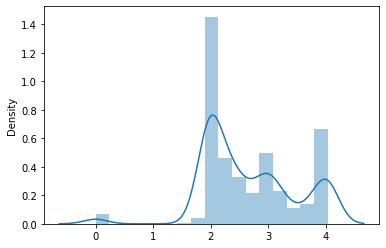

In [28]:
xx=np.cbrt(x["Fare"].values.reshape(-1,1))
sns.distplot(xx)
dd=pd.DataFrame(xx)

In [29]:
x["Fare"]

0       7.2500
1      65.6344
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [30]:
x["Fare"]=dd

In [143]:
x.iloc[:,5].skew()

-1.1827568449264443

# Detecting Multicollinearity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [37]:
calc_vif(x)

,variables,VIF
0,Pclass,5.569858
1,Sex,3.085659
2,Age,7.292035
3,SibSp,1.703455
4,Parch,1.657389
5,Fare,8.350482
6,Embarked,4.753523


Pclass, Age and Fare have VIF>5, indicating presence of multicollinearity in datastet. 

In [38]:
X = x.drop(["Fare"],axis=1)
calc_vif(X)

,variables,VIF
0,Pclass,5.517345
1,Sex,3.073692
2,Age,3.998433
3,SibSp,1.510815
4,Parch,1.521882
5,Embarked,4.666322


# Oversampling

In [39]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [40]:
X.shape

(891, 6)

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new, y_new = sm.fit_resample(X, y)

In [42]:
y_new.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [43]:
y=y_new

# Traning and Testing

# Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


mns=MinMaxScaler()
s=mns.fit_transform(x_new)
x=pd.DataFrame(data=s)
print(x)

        0    1         2      3         4    5
0     1.0  1.0  0.375000  0.125  0.000000  1.0
1     0.0  0.0  0.682692  0.125  0.000000  0.0
2     1.0  0.0  0.451923  0.000  0.000000  1.0
3     0.0  0.0  0.625000  0.125  0.000000  1.0
4     1.0  1.0  0.625000  0.000  0.000000  1.0
...   ...  ...       ...    ...       ...  ...
1093  0.5  0.0  0.527329  0.250  0.000000  1.0
1094  0.5  0.0  0.375000  0.000  0.000000  1.0
1095  0.0  0.0  0.270588  0.000  0.000000  1.0
1096  0.5  0.0  0.005213  0.125  0.166667  0.0
1097  0.0  0.0  0.581381  0.000  0.000000  1.0

[1098 rows x 6 columns]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()

In [46]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if  round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i)
        print("training accuracy: ",round(accuracy_score(y_train,pred_train)))
        print("testing accuracy:", round(accuracy_score(y_test,pred_test)))
        print("\n")
       

At random state 51
training accuracy:  1
testing accuracy: 1


At random state 56
training accuracy:  1
testing accuracy: 1


At random state 459
training accuracy:  1
testing accuracy: 1


At random state 490
training accuracy:  1
testing accuracy: 1


At random state 651
training accuracy:  1
testing accuracy: 1


At random state 752
training accuracy:  1
testing accuracy: 1


At random state 758
training accuracy:  1
testing accuracy: 1




In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=758)

In [62]:
lg.fit(x_train,y_train) 
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)

In [63]:
print("Train Accuracy:",accuracy_score(y_train,pred_train))

Train Accuracy: 0.7949886104783599


In [64]:
print("Test Accuracy:",accuracy_score(y_test,pred_test))

Test Accuracy: 0.7954545454545454


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       114
           1       0.76      0.82      0.79       106

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



# Cross validation

In [52]:
pred_lg=lg.predict(x_test)
lss=accuracy_score(y_test,pred_lg)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=j)
    print(cv_score)
    cv_mean=cv_score.mean()
    print("At cv:",j)
    print("cv score is ",cv_mean*100)
    print("accuracy is", lss*100)
    print("\n")

[0.77959927 0.79781421]
At cv: 2
cv score is  78.87067395264117
accuracy is 78.63636363636364


[0.77868852 0.76775956 0.81967213]
At cv: 3
cv score is  78.87067395264117
accuracy is 78.63636363636364


[0.76727273 0.74909091 0.80656934 0.81751825]
At cv: 4
cv score is  78.51128069011281
accuracy is 78.63636363636364


[0.76818182 0.79545455 0.74090909 0.82191781 0.80821918]
At cv: 5
cv score is  78.69364881693649
accuracy is 78.63636363636364


[0.7704918  0.80327869 0.74863388 0.78688525 0.84153005 0.80327869]
At cv: 6
cv score is  79.23497267759564
accuracy is 78.63636363636364


[0.75796178 0.84076433 0.74522293 0.74522293 0.81528662 0.84076433
 0.80128205]
At cv: 7
cv score is  79.23578544597653
accuracy is 78.63636363636364


[0.7826087  0.79710145 0.78832117 0.73722628 0.7810219  0.82481752
 0.84671533 0.78832117]
At cv: 8
cv score is  79.32666878239712
accuracy is 78.63636363636364


[0.78688525 0.78688525 0.79508197 0.77868852 0.76229508 0.76229508
 0.85245902 0.82786885 0.795

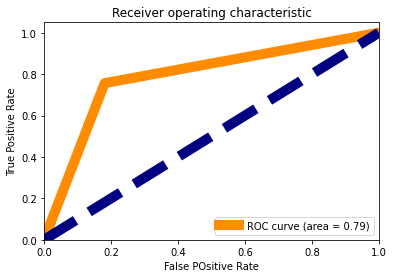

In [53]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",accuracy_score(y_train,model_pred_train))
    print("Accuracy of test data :",accuracy_score(y_test,model_pred_test))
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   
    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


Accuracy of training model : 0.8587699316628702
Accuracy of test data : 0.8

Classification report for test data
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       114
           1       0.77      0.83      0.80       106

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220

Classification report for training data
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       435
           1       0.88      0.83      0.86       443

    accuracy                           0.86       878
   macro avg       0.86      0.86      0.86       878
weighted avg       0.86      0.86      0.86       878

Confusion Matrix
 [[88 26]
 [18 88]]




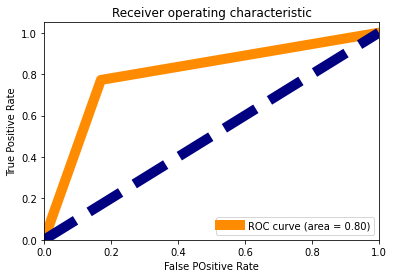

In [55]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVM Model

Accuracy of training model : 0.8302961275626424
Accuracy of test data : 0.8045454545454546

Classification report for test data
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       109
           1       0.85      0.75      0.79       111

    accuracy                           0.80       220
   macro avg       0.81      0.81      0.80       220
weighted avg       0.81      0.80      0.80       220

Classification report for training data
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       440
           1       0.85      0.80      0.83       438

    accuracy                           0.83       878
   macro avg       0.83      0.83      0.83       878
weighted avg       0.83      0.83      0.83       878

Confusion Matrix
 [[94 15]
 [28 83]]




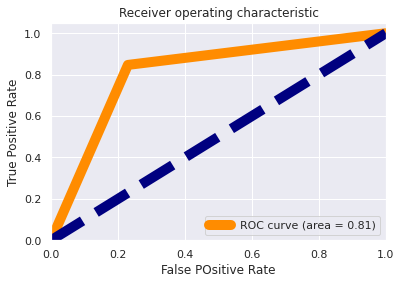

In [ ]:
from sklearn import svm
s=svm.SVC()
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 1.0
Accuracy of test data : 0.8136363636363636

Classification report for test data
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       109
           1       0.83      0.79      0.81       111

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00       438

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878

Confusion Matrix
 [[91 18]
 [23 88]]




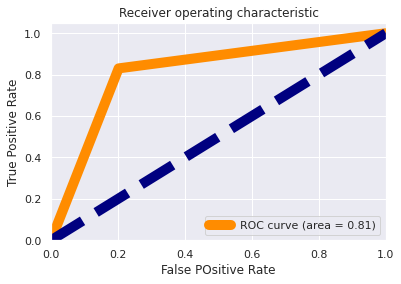

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

# Ensemble Methods

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'oob_score':['True','False'],
           'n_estimators':range(0,200,10)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

KeyboardInterrupt: ignored

In [ ]:
rf=RandomForestClassifier(n_estimators=20, class_weight= 'balanced',criterion='entropy', max_features='log2', oob_score= 'True')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
print('Training Accuracy',train_r2*100)


y_pred = rf.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


# AdaBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameter={'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate' : [0.0,1.0,2.0],
           'random_state':range(0,100,10),
           'n_estimators':range(0,100,10)}

rf2=AdaBoostClassifier()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
rf2=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 1.0, n_estimators= 90,random_state= 0)
rf2.fit(x_train,y_train)
train_r2=rf2.score(x_train,y_train)
print('Training Accuracy',train_r2*100)


y_pred = rf2.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

rfscore=cross_val_score(rf2,x,y,cv=21)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
          'learning_rate' : [0.0,1.0,2.0],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,10)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
rf3=GradientBoostingClassifier(criterion='mse',learning_rate=1.0, loss='exponential', max_features= 'auto', n_estimators= 50)
rf3.fit(x_train,y_train)
train_r2=rf3.score(x_train,y_train)
print('Training Accuracy',train_r2*100)


y_pred = rf3.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

rfscore=cross_val_score(rf3,x,y,cv=40)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


# BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameter={
           'oob_score': [True,False],
           'n_jobs':range(0,100,10),
           'random_state':range(0,100,10),
           'n_estimators':range(0,100,10)}

rf4=BaggingClassifier()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
rf4=BaggingClassifier(n_jobs=10, oob_score= True, random_state=0, n_estimators= 20)
rf4.fit(x_train,y_train)
train_r2=rf4.score(x_train,y_train)
print('Training Accuracy',train_r2*100)


y_pred = rf4.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

rfscore=cross_val_score(rf4,x,y,cv=19)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


# StackingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
parameter={
            'stack_method':['auto', 'predict_proba', 'decision_function', 'predict'],
           'n_jobs':range(0,100,10)
         }

rf5=StackingClassifier(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
rf5=StackingClassifier(estimators,n_jobs=10, stack_method= 'auto')
rf5.fit(x_train,y_train)
train_r2=rf5.score(x_train,y_train)
print('Training Accuracy',train_r2*100)


y_pred = rf5.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

rfscore=cross_val_score(rf5,x,y,cv=15)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


# Model Saving

In [65]:
import pickle
filename='rfz.pk1'
pickle.dump(lg,open(filename,'wb'))

# Loading Model

In [66]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

79.54545454545455


# Testing Loaded Model

In [129]:
def test_inp():
  inp = []
  i=0
  print("Enter either 0 or 1 as single input\n")
  while i<6:
    inn=int(input(f"Enter input {i+1}: "))
    inp.append(inn)
    i=i+1
  input_data_as_numpy_array = np.asarray(inp)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  prediction = loaded_model.predict(input_data_reshaped)
  if prediction[0]==0:
      print("\nStatus: Dead")
  if prediction[0]==1:
      print("\nStatus: Alive")

In [139]:
print("Input\n",x.head(),"\n\nOutput\n",y.head())

Input
      0    1         2      3    4    5
0  1.0  1.0  0.375000  0.125  0.0  1.0
1  0.0  0.0  0.682692  0.125  0.0  0.0
2  1.0  0.0  0.451923  0.000  0.0  1.0
3  0.0  0.0  0.625000  0.125  0.0  1.0
4  1.0  1.0  0.625000  0.000  0.0  1.0 

Output
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In above table we have seen that 
- Input 0th row gives output 0 i.e dead 
-Input 1st row gives output 1 i.e alive
-Input 2nd row gives output 1 i.e alive
-Input 3rd row gives output 1 i.e alive
-Input 4th row gives output 0 i.e dead 

So we can use this input data with loaded model to test if model gives correct output

In [128]:
test_inp()

Enter either 0 or 1 as single input
Enter input 1: 1
Enter input 2: 0
Enter input 3: 0
Enter input 4: 0
Enter input 5: 0
Enter input 6: 1
Status: Alive


In [140]:
test_inp()

Enter either 0 or 1 as single input

Enter input 1: 1
Enter input 2: 1
Enter input 3: 0
Enter input 4: 0
Enter input 5: 0
Enter input 6: 1

Status: Dead
